# Pacakges 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load Data 

In [2]:
# Load the stock price data
df = pd.read_csv('suzuki_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2001-01-01,10.25,10.25,10.25,10.25,1000.0
1,2001-01-02,10.25,11.50,10.70,11.30,10500.0
2,2001-01-03,11.30,11.30,10.75,10.75,6500.0
3,2001-01-04,10.75,11.30,11.25,11.25,3000.0
4,2001-01-05,11.25,11.30,11.05,11.05,6500.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
5247,2022-11-11,161.50,162.98,159.00,160.84,18222.0
5248,2022-11-14,159.00,159.85,156.94,157.25,52296.0
5249,2022-11-15,158.50,164.50,157.01,162.27,151394.0
5250,2022-11-16,163.00,164.00,160.00,160.29,49327.0
5251,2022-11-17,161.69,161.70,158.60,159.21,43334.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5252 entries, 0 to 5251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5252 non-null   object 
 1   Open    5252 non-null   float64
 2   High    5252 non-null   float64
 3   Low     5252 non-null   float64
 4   Close   5252 non-null   float64
 5   Volume  5252 non-null   float64
dtypes: float64(5), object(1)
memory usage: 246.3+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,5252.000000,5252.000000,5252.000000,5252.000000,5.252000e+03
mean,224.177348,227.862561,220.687150,223.995476,1.664664e+05
std,168.323509,170.647021,165.927857,168.175416,3.139633e+05
min,7.500000,7.500000,7.100000,7.500000,0.000000e+00
25%,88.167500,89.875000,87.000000,88.235000,1.778900e+04
50%,173.595000,177.520000,170.565000,173.605000,6.015000e+04
75%,344.872500,349.000000,338.025000,344.012500,1.775918e+05
max,911.700000,936.420000,880.000000,903.910000,4.473500e+06


In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date    Open    High     Low   Close    Volume
0    2001-01-01   10.25   10.25   10.25   10.25    1000.0
1    2001-01-02   10.25   11.50   10.70   11.30   10500.0
2    2001-01-03   11.30   11.30   10.75   10.75    6500.0
3    2001-01-04   10.75   11.30   11.25   11.25    3000.0
4    2001-01-05   11.25   11.30   11.05   11.05    6500.0
...         ...     ...     ...     ...     ...       ...
5247 2022-11-11  161.50  162.98  159.00  160.84   18222.0
5248 2022-11-14  159.00  159.85  156.94  157.25   52296.0
5249 2022-11-15  158.50  164.50  157.01  162.27  151394.0
5250 2022-11-16  163.00  164.00  160.00  160.29   49327.0
5251 2022-11-17  161.69  161.70  158.60  159.21   43334.0

[5252 rows x 6 columns]


In [8]:
# Select the close column for prediction
df1= df.reset_index()['Close']
print(df1.shape)

(5252,)


# Feature scaling 

In [9]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [10]:
# Create a new DataFrame with scaled 'Close' values and the original 'Date' column
df_scaled = pd.DataFrame(scaled_data, columns=['Scaled Close'])
df_scaled['Date'] = df['Date']

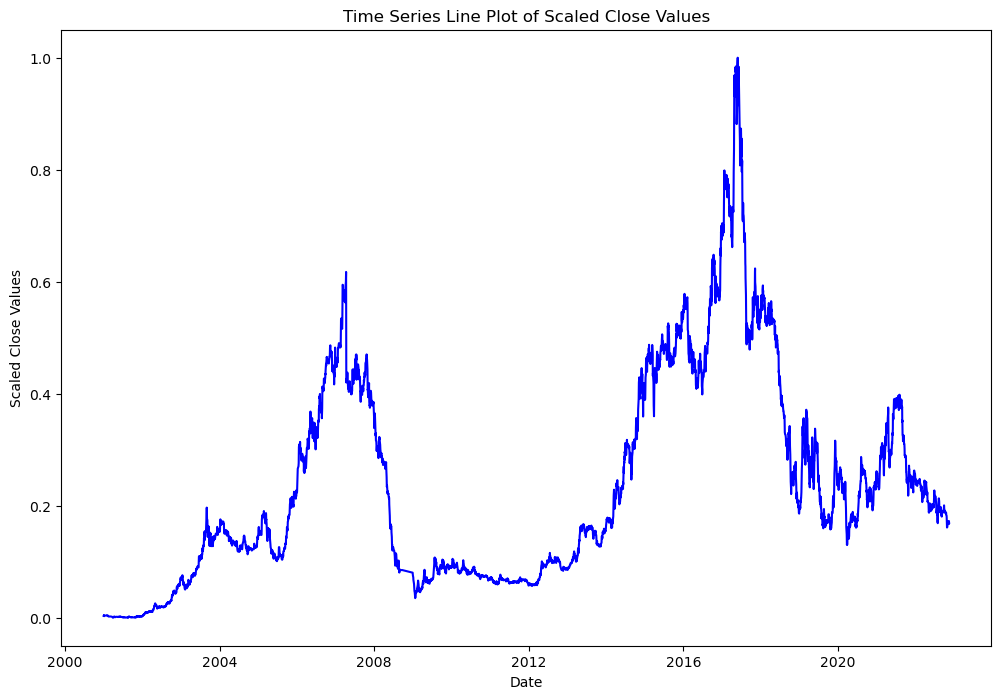

In [11]:
# Time series line plot
plt.figure(figsize=(12, 8))
plt.plot(df_scaled['Date'], df_scaled['Scaled Close'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Scaled Close Values')
plt.title('Time Series Line Plot of Scaled Close Values')
plt.show()

In [12]:
print(scaled_data)

[[0.00306779]
 [0.00423913]
 [0.00362557]
 ...
 [0.17265537]
 [0.17044656]
 [0.16924175]]


In [13]:
print(scaled_data.shape)

(5252, 1)


# Splitting the Dataset

In [14]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.95)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [15]:
print("shape of train_data: ",train_data.shape)
print("shape of test_data: ",test_data.shape)

shape of train_data:  (4989, 1)
shape of test_data:  (263, 1)


In [16]:
# Create new dataset according to the requirement of time-series prediction
# window size is the time step for time series prediction
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

In [17]:
window_size = 20
split_ratio = 0.8  # Adjust the split ratio as needed

# Calculate the split index based on the ratio
split_index = int(len(train_data) * split_ratio)

# Split the data
X_train, Y_train = create_dataset(train_data[:split_index], window_size)
X_val, Y_val = create_dataset(train_data[split_index:], window_size)
X_test, Y_test = create_dataset(test_data, window_size)

In [18]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_val: ", X_val.shape)
print("shape of Y_val: ", Y_val.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test:", Y_test.shape)

shape of X_train:  (3971, 20)
shape of Y_train:  (3971,)
shape of X_val:  (978, 20)
shape of Y_val:  (978,)
shape of X_test:  (243, 20)
shape of Y_test: (243,)


In [19]:
# Reshape input data for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Model Building (RNN)

In [20]:
# Create and compile the model
model = keras.models.Sequential()
model.add(layers.LSTM(units=64, input_shape=(window_size, 1), activation='tanh'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train the model
FC_model = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_val, Y_val), verbose=1)

Epoch 1/100
63/63 [==============================] - 8s 48ms/step - loss: 0.0349 - mean_absolute_error: 0.1316 - val_loss: 8.9868e-04 - val_mean_absolute_error: 0.0233
Epoch 2/100
63/63 [==============================] - 2s 31ms/step - loss: 0.0019 - mean_absolute_error: 0.0273 - val_loss: 0.0014 - val_mean_absolute_error: 0.0304
Epoch 3/100
63/63 [==============================] - 2s 29ms/step - loss: 0.0012 - mean_absolute_error: 0.0229 - val_loss: 0.0014 - val_mean_absolute_error: 0.0297
Epoch 4/100
63/63 [==============================] - 2s 30ms/step - loss: 9.8071e-04 - mean_absolute_error: 0.0210 - val_loss: 0.0010 - val_mean_absolute_error: 0.0260
Epoch 5/100
63/63 [==============================] - 2s 34ms/step - loss: 9.3126e-04 - mean_absolute_error: 0.0206 - val_loss: 0.0011 - val_mean_absolute_error: 0.0254
Epoch 6/100
63/63 [==============================] - 2s 33ms/step - loss: 7.9123e-04 - mean_absolute_error: 0.0191 - val_loss: 9.4900e-04 - val_mean_absolute_error: 0.0

In [23]:
pred= model.predict(X_test)
pred.shape
print("shape ypred",pred.shape)
print(pred)


8/8 [==============================] - 2s 11ms/step
shape ypred (243, 1)
[[0.2273278 ]
 [0.23188782]
 [0.23917101]
 [0.23885697]
 [0.2420554 ]
 [0.23493358]
 [0.2329603 ]
 [0.23310347]
 [0.23627976]
 [0.23821525]
 [0.23316264]
 [0.22762541]
 [0.22117043]
 [0.22705321]
 [0.23912728]
 [0.23891625]
 [0.23922591]
 [0.24883044]
 [0.25168493]
 [0.25358358]
 [0.24959266]
 [0.24311426]
 [0.24597885]
 [0.24791417]
 [0.24971294]
 [0.24921517]
 [0.2462873 ]
 [0.23950359]
 [0.24024034]
 [0.23974743]
 [0.23431817]
 [0.23372325]
 [0.23415203]
 [0.2355434 ]
 [0.23732513]
 [0.2381346 ]
 [0.23649748]
 [0.2339936 ]
 [0.231598  ]
 [0.22960234]
 [0.23142615]
 [0.23502168]
 [0.2337726 ]
 [0.23469085]
 [0.23611906]
 [0.23542124]
 [0.23391752]
 [0.23353179]
 [0.23487277]
 [0.23624994]
 [0.23605558]
 [0.23507527]
 [0.23524426]
 [0.23521389]
 [0.2352083 ]
 [0.23424582]
 [0.23829345]
 [0.23579907]
 [0.23452646]
 [0.23333625]
 [0.23203947]
 [0.23170948]
 [0.2307831 ]
 [0.22749574]
 [0.22663811]
 [0.2227738 ]
 [0

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Calculate the root mean squared error (RMSE) and mean absolute error (MAE) for test data
mse = mean_squared_error(Y_test,pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error for Y test: ", rmse)

mae = mean_absolute_error(Y_test,pred)
print("Mean Absolute Error for Y test: ", mae)

Root Mean Squared Error for Y test:  0.008669714699544232
Mean Absolute Error for Y test:  0.00721846898982182


In [25]:
OT = scaler.inverse_transform(Y_test.reshape(-1,1)) 
OP = scaler.inverse_transform(pred)
print(OT.shape)
print(OP.shape)

mae = 0.0
smae = 0.0
for i in range(Y_test.shape[0]):
    mae = abs(OT[i] - OP[i])
    smae = smae + mae
    print("True:" , OT[i],  "Predicted:" , OP[i], "MAE:" , mae)
    
tsmae = smae / Y_test.shape[0]
print("Errrrrrrrr avg" , tsmae)

mae = mean_absolute_error(OT, OP)
print("Mean Absolute Error for Y test: ", mae)

tt = scaler.inverse_transform(np.array(0.040080342516531836).reshape(1, -1))
print("Inverse transformed mae: ", tt)

(243, 1)
(243, 1)
True: [223.49] Predicted: [211.2789] MAE: [12.21109985]
True: [231.51] Predicted: [215.36656] MAE: [16.14343811]
True: [227.48] Predicted: [221.89528] MAE: [5.58472107]
True: [232.9] Predicted: [221.61377] MAE: [11.28623047]
True: [221.09] Predicted: [224.4809] MAE: [3.390896]
True: [222.34] Predicted: [218.09682] MAE: [4.24318298]
True: [223.13] Predicted: [216.32794] MAE: [6.80205811]
True: [227.4] Predicted: [216.45628] MAE: [10.94371643]
True: [228.35] Predicted: [219.30353] MAE: [9.04647217]
True: [220.17] Predicted: [221.03853] MAE: [0.86852844]
True: [215.] Predicted: [216.50932] MAE: [1.50932312]
True: [208.12] Predicted: [211.5457] MAE: [3.42570007]
True: [220.22] Predicted: [205.75938] MAE: [14.46061584]
True: [233.94] Predicted: [211.03276] MAE: [22.90723938]
True: [227.29] Predicted: [221.85608] MAE: [5.4339209]
True: [228.87] Predicted: [221.66692] MAE: [7.20308411]
True: [242.48] Predicted: [221.94449] MAE: [20.53551147]
True: [241.33] Predicted: [230.55

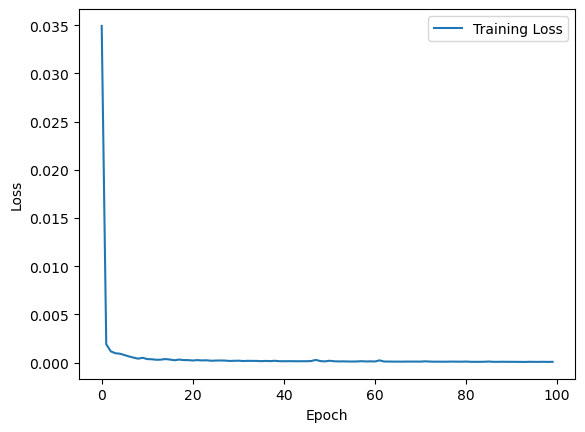

In [26]:
# Plot training loss
plt.plot(FC_model.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

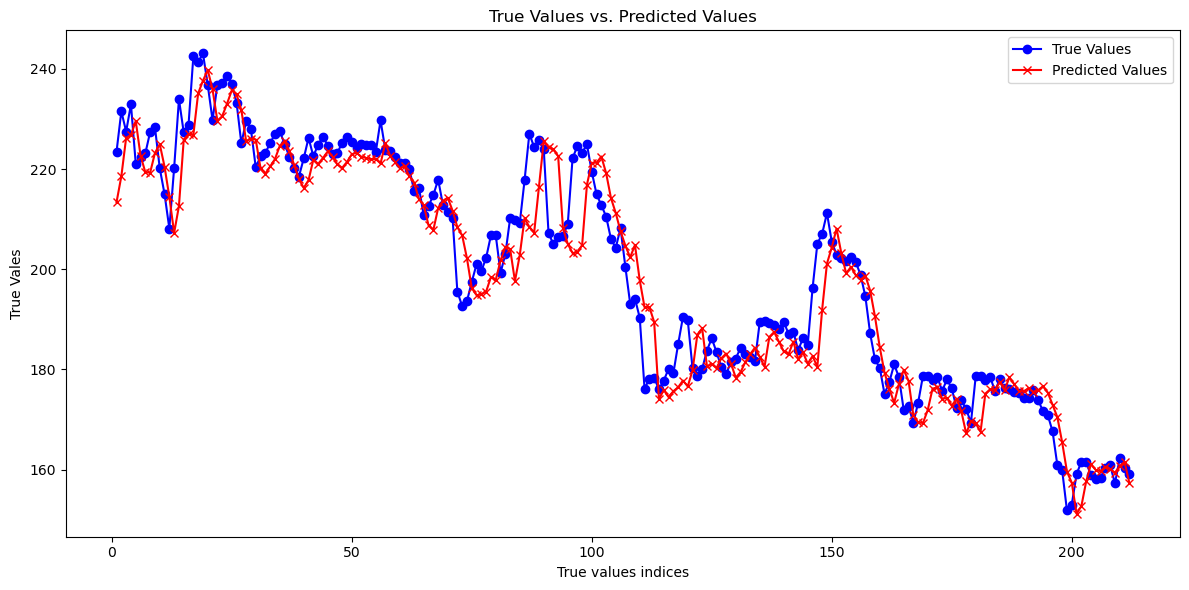

In [27]:
true_values = [223.49, 231.51, 227.48, 232.9, 221.09, 222.34, 223.13, 227.4, 228.35, 220.17, 215.0, 208.12, 220.22, 233.94, 227.29, 228.87, 242.48, 241.33, 243.09, 236.79, 229.77, 236.74, 237.19, 238.59, 237.01, 233.26, 225.11, 229.54, 227.9, 220.34, 222.52, 223.26, 225.1, 227.07, 227.54, 225.03, 222.45, 220.28, 218.5, 222.13, 226.22, 222.54, 224.89, 226.43, 224.69, 222.99, 223.22, 225.23, 226.4, 225.44, 224.23, 225.01, 224.78, 224.76, 223.34, 229.71, 223.81, 223.62, 222.47, 221.12, 221.25, 219.99, 215.65, 216.22, 210.76, 212.61, 214.79, 217.89, 212.84, 211.39, 210.27, 195.54, 192.63, 193.62, 197.46, 200.98, 199.61, 202.29, 206.77, 206.75, 199.3, 202.98, 210.2, 209.87, 209.16, 217.73, 227.05, 224.36, 225.73, 223.9, 207.15, 205.04, 206.42, 206.64, 208.97, 222.11, 224.6, 223.29, 224.9, 219.46, 214.96, 212.77, 210.5, 206.05, 204.26, 208.21, 200.49, 193.15, 194.14, 190.3, 176.11, 178.14, 178.37, 176.0, 177.75, 180.09, 179.19, 185.05, 190.46, 189.84, 180.22, 178.74, 180.07, 183.76, 186.21, 183.42, 180.49, 178.98, 181.54, 182.17, 184.29, 183.01, 182.55, 181.67, 189.48, 189.62, 189.25, 188.8, 188.12, 189.48, 187.1, 187.5, 183.81, 186.24, 184.93, 196.18, 205.07, 207.06, 211.21, 205.47, 202.92, 202.15, 201.72, 202.41, 201.44, 198.86, 194.58, 187.17, 181.99, 180.3, 175.06, 177.48, 181.01, 178.42, 171.86, 172.63, 169.36, 173.36, 178.71, 178.65, 177.8, 178.46, 175.7, 177.99, 176.22, 172.26, 173.85, 172.07, 169.36, 178.71, 178.65, 177.8, 178.46, 175.7, 177.99, 176.22, 176.03, 175.51, 175.29, 174.31, 174.29, 175.8, 173.86, 171.68, 170.9, 167.62, 160.87, 159.87, 151.83, 153.01, 159.07, 161.56, 161.48, 158.85, 158.14, 158.38, 160.36, 160.84, 157.25, 162.27, 160.29, 159.21]

predicted_values = [213.36765, 218.55534, 226.23274, 226.7798, 229.57246, 222.69289, 219.33601, 219.28383, 223.19234, 224.96208, 220.47568, 214.41827, 207.24883, 212.60768, 225.87497, 226.98375, 226.79085, 235.0911, 237.62529, 239.75752, 235.89569, 229.65678, 230.52612, 232.99496, 235.68071, 234.9096, 231.77315, 225.57285, 226.06206, 225.8765, 220.10931, 219.00642, 220.52052, 221.96996, 224.59683, 225.61885, 223.6232, 220.78947, 218.00702, 216.22627, 217.77148, 221.88013, 221.02713, 222.19302, 223.52371, 222.47372, 220.92519, 220.23209, 221.40623, 222.9499, 223.23988, 222.44534, 222.21132, 221.94543, 222.01105, 221.1167, 225.10654, 222.64557, 221.42674, 220.17526, 220.52052, 218.59358, 217.3017, 213.96893, 212.7296, 208.7579, 207.83728, 212.19557, 213.66319, 214.26624, 211.70076, 208.41151, 206.77283, 202.17819, 196.22751, 194.81213, 194.99474, 195.53944, 198.46036, 197.86511, 201.73874, 204.4229, 204.01704, 197.61668, 202.78886, 210.14514, 208.44493, 207.30013, 216.49037, 225.55333, 224.31099, 223.97922, 222.5724, 208.19286, 205.06653, 203.22844, 203.36433, 204.83292, 216.87347, 221.20917, 221.26707, 222.49622, 219.15532, 214.21625, 211.21165, 207.57117, 204.70781, 202.3542, 204.82732, 197.76498, 192.40292, 192.44261, 189.4686, 174.05742, 175.8687, 174.47026, 175.64003, 176.41716, 177.77144, 176.59636, 179.81989, 186.94641, 188.18628, 180.61372, 181.05804, 180.25485, 182.2273, 183.15314, 181.16684, 178.34874, 179.44911, 181.44882, 183.01543, 184.3452, 182.50171, 180.537, 186.49257, 187.4528, 185.52962, 183.57399, 182.99918, 185.5582, 182.05724, 183.3942, 181.15294, 182.64659, 180.50589, 191.94733, 201.10898, 204.32986, 208.10858, 203.15135, 199.14493, 200.47266, 198.79936, 197.90895, 198.72046, 195.73117, 190.56604, 184.42351, 179.32141, 176.14713, 173.30411, 177.09285, 179.87671, 177.72757, 170.82547, 169.41437, 169.29576, 171.89122, 176.15344, 176.40558, 174.12517, 174.2852, 172.75394, 174.11984, 171.61813, 167.21143, 169.60182, 169.20773, 167.54286, 175.16907, 176.02498, 175.88893, 177.48856, 175.85919, 178.38858, 177.08066, 175.6508, 175.64754, 176.20532, 175.49503, 175.85344, 176.60414, 175.3813, 172.95366, 170.44754, 165.44179, 159.59105, 157.38272, 151.18701, 152.68292, 157.61714, 161.06941, 159.9055, 159.6853, 160.57124, 160.08119, 159.37938, 160.71281, 161.55806, 157.32019, 162.71587, 161.33376, 160.4308]

# Calculate MAE
mae_values = [10.12235474, 12.95465637, 1.24725769, 6.12019958, 8.48246399, 0.35288635, 3.79398621, 8.11617126, 5.15766296, 4.79208191]

# Create a list of data point indices for the x-axis 
True_values_indices = list(range(1, len(true_values) + 1))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(True_values_indices, true_values, label='True Values', marker='o', linestyle='-', color='b')
plt.plot(True_values_indices, predicted_values[:len(true_values)], label='Predicted Values', marker='x', linestyle='-', color='r')
plt.xlabel('True values indices')
plt.ylabel('True Vales')
plt.title('True Values vs. Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

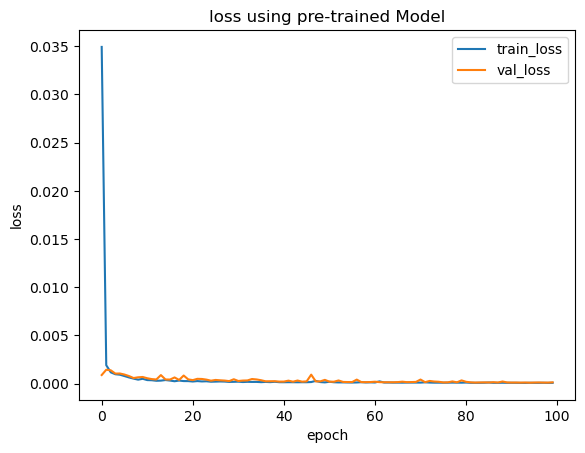

None


In [28]:
plt.plot(FC_model.history['loss'])
plt.plot(FC_model.history['val_loss'])
plt.title('loss using pre-trained Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
print(plt.show())